## Downloading & Unzipping Dataset

In [1]:
# Login to AIcrowd
# !pip install aicrowd-cli > /dev/null
# !aicrowd login

In [2]:
# List dataset for this challenge
# !aicrowd dataset list -c food-recognition-benchmark-2022

# # Download dataset
# !aicrowd dataset download -c food-recognition-benchmark-2022

In [3]:
# Create data directory
# %mkdir fdata && cd fdata && mkdir train val test
# %cd fdata/test && tar -xvf public_test_release_2.1.tar
# %cd fdata/val && tar -xvf public_validation_set_release_2.1.tar
# %cd fdata/train && tar -xvf public_training_set_release_2.1.tar

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import json

# For reading annotations file
from pycocotools.coco import COCO

# utilities
from collections import OrderedDict

# For data visualisation
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Data Exploration 🧐

In this section we are going to read our dataset & doing some data visualisations 

## Reading Data

In [2]:
# Reading annotations.json
TRAIN_ANNOTATIONS_PATH = "fdata/train/annotations.json"
TRAIN_IMAGE_DIRECTIORY = "fdata/train/images/"

VAL_ANNOTATIONS_PATH = "fdata/val/annotations.json"
VAL_IMAGE_DIRECTIORY = "fdata/val/images/"

train_coco = COCO(TRAIN_ANNOTATIONS_PATH)

loading annotations into memory...
Done (t=5.94s)
creating index...
index created!


In [3]:
# Reading the annotation files
with open(TRAIN_ANNOTATIONS_PATH) as f:
  train_annotations_data = json.load(f)

with open(VAL_ANNOTATIONS_PATH) as f:
  val_annotations_data = json.load(f)

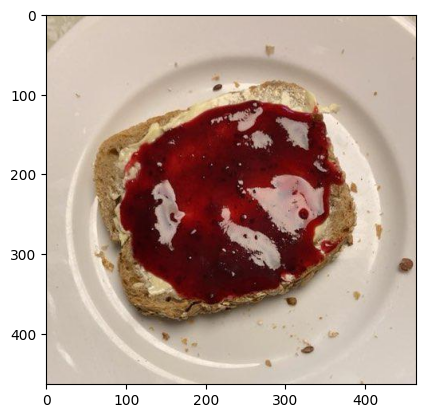

In [4]:
from PIL import Image
path = './fdata/train/images/131072.jpg'
get_image = Image.open(path)
plt.imshow(get_image)
plt.show()

In [5]:
train_annotations_data['annotations'][0]

{'id': 184123,
 'image_id': 131072,
 'category_id': 101246,
 'segmentation': [[169.0,
   379.5,
   130.0,
   374.5,
   112.0,
   363.5,
   94.5,
   340.0,
   61.5,
   213.0,
   61.5,
   188.0,
   70.5,
   168.0,
   87.0,
   152.5,
   103.0,
   143.5,
   123.0,
   139.5,
   185.0,
   118.5,
   226.0,
   90.5,
   249.0,
   87.5,
   309.0,
   88.5,
   339.0,
   110.5,
   350.5,
   125.00000000000001,
   354.5,
   155.0,
   382.5,
   231.0,
   383.5,
   277.0,
   360.0,
   303.5,
   327.0,
   331.5,
   308.0,
   343.5,
   216.0,
   373.5]],
 'area': 71393.0,
 'bbox': [61.5, 61.5, 318.0, 322.0],
 'iscrowd': 0}

In [6]:
train_annotations_data.keys()

dict_keys(['categories', 'info', 'images', 'annotations'])

In [7]:
train_annotations_data['categories']

[{'id': 50,
  'name': 'beetroot-steamed-without-addition-of-salt',
  'name_readable': 'Beetroot, steamed, without addition of salt',
  'supercategory': 'food'},
 {'id': 101246,
  'name': 'bread_wholemeal',
  'name_readable': 'bread_wholemeal',
  'supercategory': 'food'},
 {'id': 100546,
  'name': 'jam',
  'name_readable': 'jam',
  'supercategory': 'food'},
 {'id': 101129,
  'name': 'water',
  'name_readable': 'water',
  'supercategory': 'food'},
 {'id': 101243,
  'name': 'bread',
  'name_readable': 'bread',
  'supercategory': 'food'},
 {'id': 100133,
  'name': 'banana',
  'name_readable': 'banana',
  'supercategory': 'food'},
 {'id': 101306,
  'name': 'soft_cheese',
  'name_readable': 'soft_cheese',
  'supercategory': 'food'},
 {'id': 101126,
  'name': 'ham_raw',
  'name_readable': 'ham_raw',
  'supercategory': 'food'},
 {'id': 101305,
  'name': 'hard_cheese',
  'name_readable': 'hard_cheese',
  'supercategory': 'food'},
 {'id': 100206,
  'name': 'cottage_cheese',
  'name_readable': 'c

## Data Format 🔍 

Our COCO data format is something like this -

```
"info": {...},
"categories": [...],
"images": [...],
"annotations": [...],
```

In which categories is like this
```
[
  {'id': 2578,
  'name': 'water',
  'name_readable': 'Water',
  'supercategory': 'food'},
  {'id': 1157,
  'name': 'pear',
  'name_readable': 'Pear',
  'supercategory': 'food'},
  ...
  {'id': 1190,
  'name': 'peach',
  'name_readable': 'Peach',
  'supercategory': 'food'}
]
```

Info is empty ( not sure why )

images is like this

```
[
  {'file_name': '065537.jpg', 
  'height': 464, 
  'id': 65537, 
  'width': 464},
  {'file_name': '065539.jpg', 
  'height': 464, 
  'id': 65539, 
  'width': 464},
 ...
  {'file_name': '069900.jpg', 
  'height': 391, 
  'id': 69900, 
  'width': 392},
]
```
Annotations is like this

```
{'area': 44320.0,
 'bbox': [86.5, 127.49999999999999, 286.0, 170.0],
 'category_id': 2578,
 'id': 102434,
 'image_id': 65537,
 'iscrowd': 0,
 'segmentation': [[235.99999999999997,
   372.5,
   169.0,
   372.5,
   ...
   368.5,
   264.0,
   371.5]]}
```


In [8]:
# Reading all classes
category_ids = train_coco.loadCats(train_coco.getCatIds())
category_names = [_["name_readable"] for _ in category_ids]

print("## Categories\n-", "\n- ".join(category_names))

## Categories
- Beetroot, steamed, without addition of salt
- bread_wholemeal
- jam
- water
- bread
- banana
- soft_cheese
- ham_raw
- hard_cheese
- cottage_cheese
- coffee
- fruit_mixed
- pancake
- tea
- salmon_smoked
- avocado
- spring_onion_scallion
- ristretto_with_caffeine
- ham_n_s
- egg
- bacon
- chips_french_fries
- juice_apple
- chicken
- tomato
- broccoli
- shrimp_prawn
- carrot
- chickpeas
- french_salad_dressing
- pasta_hornli_ch
- sauce_cream
- pasta_n_s
- tomato_sauce
- cheese_n_s
- pear
- cashew_nut
- almonds
- lentil_n_s
- mixed_vegetables
- peanut_butter
- apple
- blueberries
- cucumber
- yogurt
- butter
- mayonnaise
- soup
- wine_red
- wine_white
- green_bean_steamed_without_addition_of_salt
- sausage
- pizza_margherita_baked
- salami_ch
- mushroom
- tart_n_s
- rice
- white_coffee
- sunflower_seeds
- bell_pepper_red_raw
- zucchini
- asparagus
- tartar_sauce
- lye_pretzel_soft
- cucumber_pickled_ch
- curry_vegetarian
- soup_of_lentils_dahl_dhal
- salmon
- salt_cake_ch_

In [9]:
category_names[0]

'Beetroot, steamed, without addition of salt'

In [10]:
# Getting all categoriy with respective to their total images
no_images_per_category = {}

for n, i in enumerate(train_coco.getCatIds()):
  imgIds = train_coco.getImgIds(catIds=i)
  label = category_names[n]
  no_images_per_category[label] = len(imgIds)

img_info = pd.DataFrame(train_coco.loadImgs(train_coco.getImgIds()))
no_images_per_category = OrderedDict(sorted(no_images_per_category.items(), key=lambda x: -1*x[1]))

# Top 30 categories, based on number of images
no_images_per_category.items()

odict_items([('water', 4372), ('salad_leaf_salad_green', 2807), ('tomato', 2686), ('bread_white', 2526), ('carrot', 2193), ('butter', 2180), ('bread_wholemeal', 2030), ('coffee', 2005), ('tea', 1847), ('rice', 1546), ('egg', 1424), ('bread', 1287), ('apple', 1270), ('mixed_vegetables', 1255), ('cucumber', 1102), ('jam', 1063), ('wine_red', 936), ('cheese_n_s', 918), ('banana', 875), ('potato', 854), ('bell_pepper_red_raw', 806), ('bread_whole_wheat', 782), ('hard_cheese', 729), ('white_coffee', 699), ('espresso', 699), ('mixed_salad_chopped_without_sauce', 659), ('avocado', 647), ('tomato_sauce', 623), ('zucchini', 605), ('beef_n_s', 572), ('strawberries', 568), ('broccoli', 560), ('honey', 548), ('parmesan', 542), ('wine_white', 537), ('pasta_spaghetti', 517), ('yogurt', 513), ('mushroom', 490), ('braided_white_loaf_ch', 487), ('chips_french_fries', 478), ('chicken', 468), ('sausage', 465), ('onion', 451), ('dark_chocolate', 439), ('mayonnaise', 429), ('bacon', 426), ('pizza_margherit

In [12]:
img_info

id   file_name  width  height
0      131072  131072.jpg    464     464
1      131087  131087.jpg    464     464
2      131088  131088.jpg    511     512
3      131094  131094.jpg    480     480
4      131096  131096.jpg    464     464
...       ...         ...    ...     ...
54387  131024  131024.jpg    512     910
54388  131033  131033.jpg    455     455
54389  131053  131053.jpg    391     390
54390  131066  131066.jpg    464     464
54391  131071  131071.jpg    464     464

[54392 rows x 4 columns]

## Data Visualisations

In [13]:
fig = go.Figure([go.Bar(x=list(no_images_per_category.keys())[:50], y=list(no_images_per_category.values())[:50])])
fig.update_layout(
    title="No of Image per class",)

fig.show()

fig = go.Figure([go.Bar(x=list(no_images_per_category.keys())[50:200], y=list(no_images_per_category.values())[50:200])])
fig.update_layout(
    title="No of Image per class",)

fig.show()

fig = go.Figure([go.Bar(x=list(no_images_per_category.keys())[200:], y=list(no_images_per_category.values())[200:])])
fig.update_layout(
    title="No of Image per class",)

fig.show()

In [14]:
print(f"Average number of image per class: {sum(list(no_images_per_category.values())) / len(list(no_images_per_category.values()))}")
print(f"Highest number of image per class is: {list(no_images_per_category.keys())[0]} of { list(no_images_per_category.values())[0]}")
print(f"Lowest number of image per class is: Veggie Burger of {sorted(list(no_images_per_category.values()))[0]}")

Average number of image per class: 289.9659442724458
Highest number of image per class is: water of 4372
Lowest number of image per class is: Veggie Burger of 45


In [15]:
fig = go.Figure(data=[go.Pie(labels=list(no_images_per_category.keys()), values=list(no_images_per_category.values()), 
                             hole=.3, textposition='inside', )], )
fig.update_layout(
    title="No of Image per class ( In pie )",)
fig.show()

In [16]:
img_info['width'].max()

4608

In [17]:
img_info['height'].max()

4096

In [18]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=img_info['height']))
fig.add_trace(go.Histogram(x=img_info['width']))

# Overlay both histograms
fig.update_layout(barmode='stack', title="Histogram of Image width & height",)

fig.show()

# Image Visulisation 🖼️

In [19]:
img_info

id   file_name  width  height
0      131072  131072.jpg    464     464
1      131087  131087.jpg    464     464
2      131088  131088.jpg    511     512
3      131094  131094.jpg    480     480
4      131096  131096.jpg    464     464
...       ...         ...    ...     ...
54387  131024  131024.jpg    512     910
54388  131033  131033.jpg    455     455
54389  131053  131053.jpg    391     390
54390  131066  131066.jpg    464     464
54391  131071  131071.jpg    464     464

[54392 rows x 4 columns]

In [20]:
len(train_annotations_data['annotations'][n]['segmentation']), len(train_annotations_data['annotations'][n]['bbox'])

(1, 4)

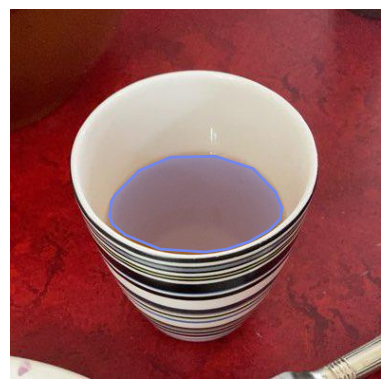

In [21]:
img_no = 7

annIds = train_coco.getAnnIds(imgIds=train_annotations_data['images'][img_no]['id'])
anns = train_coco.loadAnns(annIds)

# load and render the image
plt.imshow(plt.imread(TRAIN_IMAGE_DIRECTIORY+train_annotations_data['images'][img_no]['file_name']))
plt.axis('off')
# Render annotations on top of the image
train_coco.showAnns(anns)

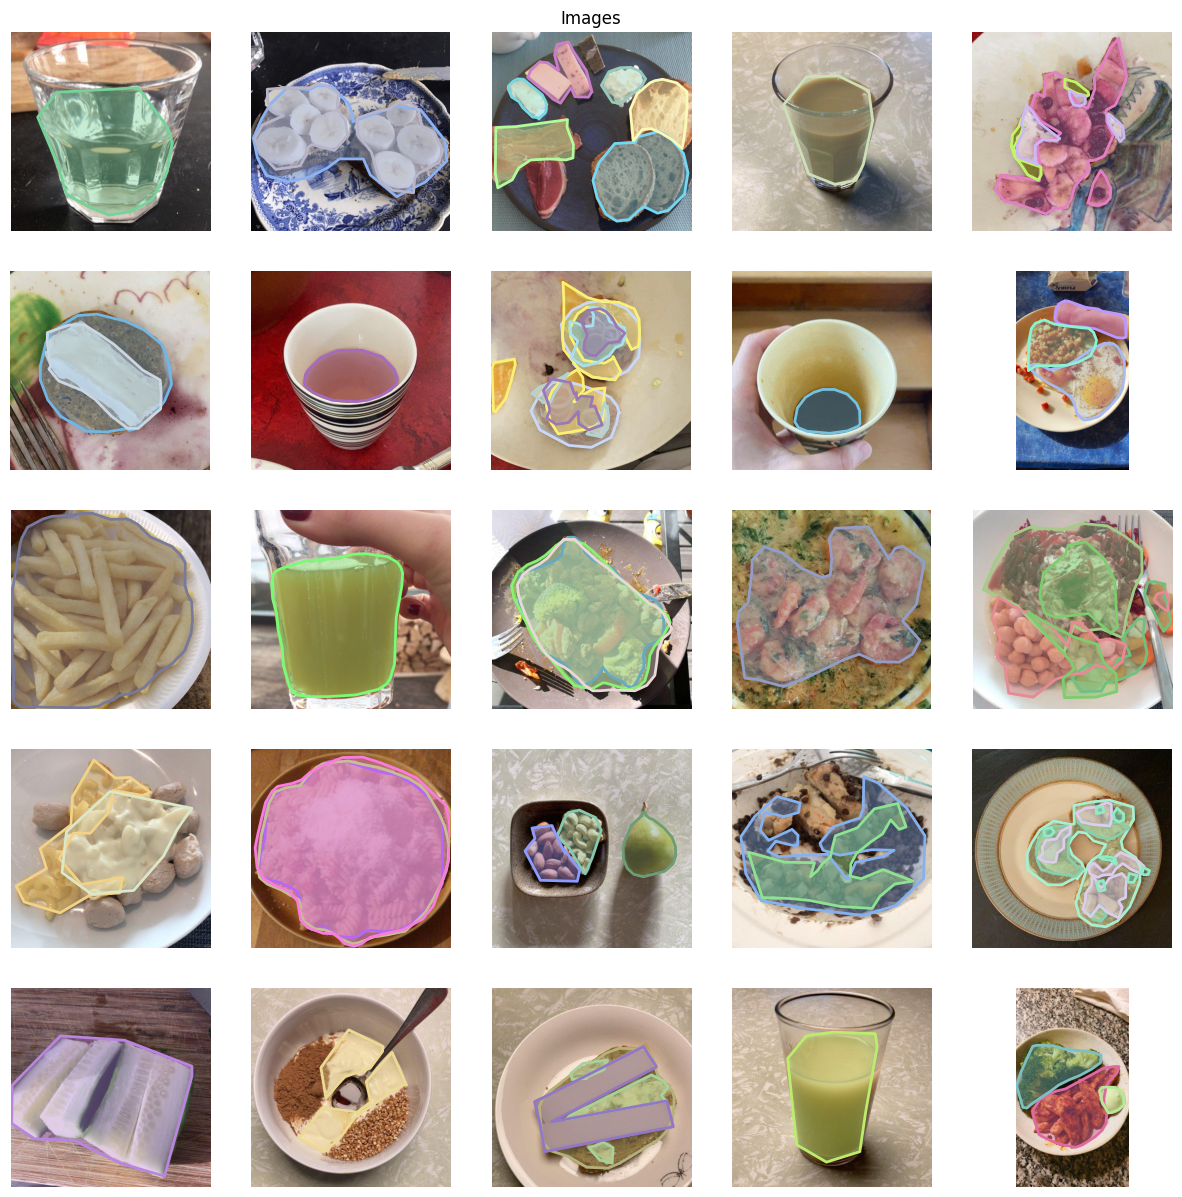

In [22]:
w, h = 15, 15 # Setting width and height of every image
rows, cols = 5, 5 # Setting the number of image rows & cols

fig = plt.figure(figsize=(15, 15)) # Making the figure with size 

plt.title("Images") 
plt.axis('off')

# Going thought every cell in rows and cols
for i in range(1, cols * rows+1):
  annIds = train_coco.getAnnIds(imgIds=img_info['id'][i])
  anns = train_coco.loadAnns(annIds)

  fig.add_subplot(rows, cols, i)

  # Show the image
  img = plt.imread(TRAIN_IMAGE_DIRECTIORY+img_info['file_name'][i])
  for i in anns:
    [x,y,w,h] = i['bbox']
    cv2.rectangle(img.astype(np.uint8), (int(x), int(y)), (int(x+h), int(y+w)), (255,0,0), 2)
  plt.imshow(img)

  # Render annotations on top of the image
  train_coco.showAnns(anns)

  # Setting the axis off
  plt.axis("off")

# Showing the figure
plt.show()